In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, make_scorer

In [19]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [20]:
covid = pd.read_hdf('./Covid_data/covid_df.hdf')
pop = pd.read_hdf('./Covid_data/population_df.hdf')
covid_per_cap = pd.read_hdf('./Covid_data/covid_per_cap_df.hdf')
ga_sent = pd.read_hdf('./data/processed/ga_sentiment_mean.hdf')

In [21]:
def state_analysis(covid_df, sent_df, state_string):

    covid_df = covid_df[pd.datetime(2020,3,19):pd.datetime(2020,8,4)]

    sent_df = sent_df[pd.datetime(2020,3,19):pd.datetime(2020,8,4)]

    covid_ca = covid_df[[f'{state_string}_cases', f'{state_string}_deaths']]
    covid_ca[[f'{state_string}_cases_diff1', f'{state_string}_deaths_diff1']] = covid_df[[f'{state_string}_cases', f'{state_string}_deaths']].diff()
    covid_ca[[f'{state_string}_cases_diff2', f'{state_string}_deaths_diff2']] = covid_df[[f'{state_string}_cases', f'{state_string}_deaths']].diff().diff()
    covid_ca = covid_ca.dropna()

    fig =  plt.figure(figsize = (15,15))

    fig.add_subplot(3,2,1)
    covid_ca[f'{state_string}_cases'].plot()

    fig.add_subplot(3,2,3)
    covid_ca[f'{state_string}_cases_diff1'].plot()

    fig.add_subplot(3,2,5)
    covid_ca[f'{state_string}_cases_diff2'].plot();

    fig.add_subplot(3,2,2)
    covid_ca[f'{state_string}_deaths'].plot(color='red')

    fig.add_subplot(3,2,4)
    covid_ca[f'{state_string}_deaths_diff1'].plot(color='red')

    fig.add_subplot(3,2,6)
    covid_ca[f'{state_string}_deaths_diff2'].plot(color='red');


    model_df = pd.concat([ca_sent, covid_ca], axis=1)
    model_df = model_df.dropna()
    
    print('R2 scores, not cross-validated, or train_test_split')
    for i in range(6):
        X = model_df[['TB_polarity', 'TB_subjectivity', 'TB_polarity_std', 'TB_subjectivity_std']]
        X = pd.concat([X,X.shift(1),X.shift(2),X.shift(3),X.shift(4),X.shift(5),X.shift(6)], axis=1)
        X = X.dropna()
        y = model_df.iloc[6:, 4+i]
        lr = LinearRegression()
        model = lr.fit(X, y)
        y_pred = model.predict(X)
        print(f'{model_df.columns[4+i]} r2 score: {r2_score(y, y_pred)}')

    print('\n R2 scores, cross-validated')
    for i in range(6):
        X = model_df[['TB_polarity', 'TB_subjectivity', 'TB_polarity_std', 'TB_subjectivity_std']]
        X = pd.concat([X,X.shift(1),X.shift(2),X.shift(3),X.shift(4),X.shift(5),X.shift(6)], axis=1)
        X = X.dropna()
        y = model_df.iloc[6:, 4+i]
        lr = LinearRegression()
        model = lr.fit(X, y)
        print(f'{model_df.columns[4+i]} cross-val r2 score: {cross_val_score(model, X, y, cv=3).mean()}')

/Users/henryvalk/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


R2 scores, not cross-validated, or train_test_split
Georgia_cases r2 score: 0.1570164036796372
Georgia_deaths r2 score: 0.06668393771087078
Georgia_cases_diff1 r2 score: 0.20613831950679096
Georgia_deaths_diff1 r2 score: 0.32500537458884426
Georgia_cases_diff2 r2 score: 0.18399221745429795
Georgia_deaths_diff2 r2 score: 0.2740034161687568

 R2 scores, cross-validated
Georgia_cases cross-val r2 score: -31.81945167218903
Georgia_deaths cross-val r2 score: -22.02831193654272
Georgia_cases_diff1 cross-val r2 score: -20.11675541899167
Georgia_deaths_diff1 cross-val r2 score: -0.39073696244163436
Georgia_cases_diff2 cross-val r2 score: -1.4002970986383108
Georgia_deaths_diff2 cross-val r2 score: -0.43064730988797645


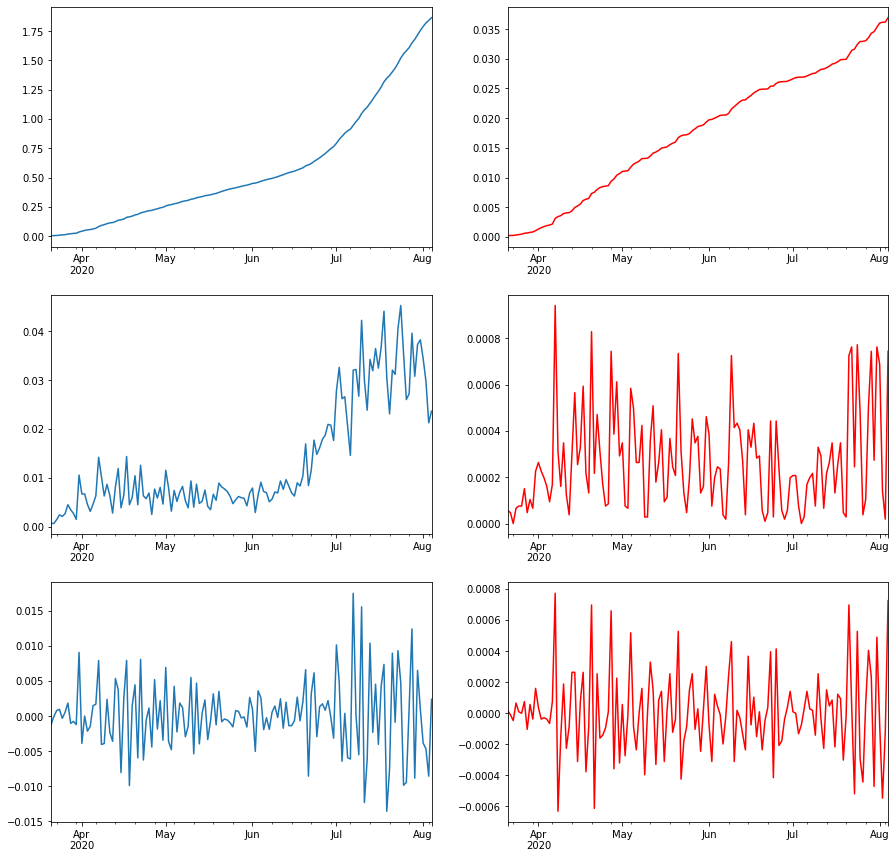

In [23]:
state_analysis(covid_per_cap, ga_sent, 'Georgia')

/Users/henryvalk/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


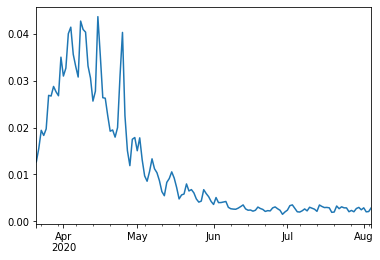

In [26]:
covid_df = covid_per_cap
covid_df = covid_df[pd.datetime(2020,3,19):pd.datetime(2020,8,4)]

covid_ca = covid_df[[f'New_York_cases', f'New_York_deaths']]
covid_ca[[f'New_York_cases_diff1', f'New_York_deaths_diff1']] = covid_df[[f'New_York_cases', f'New_York_deaths']].diff()
covid_ca[[f'New_York_cases_diff2', f'New_York_deaths_diff2']] = covid_df[[f'New_York_cases', f'New_York_deaths']].diff().diff()
covid_ca = covid_ca.dropna()
covid_ca['New_York_cases_diff1'].plot()

In [183]:
covid_per_cap = pd.read_hdf('./Covid_data/covid_per_cap_df.hdf')

def state_xcorr(covid_df, state_string, state_abbrev):

    sent_df = pd.read_hdf(f'./data/processed/{state_abbrev}_sentiment_mean.hdf')

    covid_df = covid_df[pd.datetime(2020,3,19):pd.datetime(2020,8,4)]
    sent_df = sent_df[pd.datetime(2020,3,19):pd.datetime(2020,8,4)]

    covid_ca = covid_df[[f'{state_string}_cases', f'{state_string}_deaths']]
    covid_ca[[f'{state_string}_cases_diff1', f'{state_string}_deaths_diff1']] = covid_df[[f'{state_string}_cases', f'{state_string}_deaths']].diff()
    covid_ca[[f'{state_string}_cases_diff2', f'{state_string}_deaths_diff2']] = covid_df[[f'{state_string}_cases', f'{state_string}_deaths']].diff().diff()
    covid_ca = covid_ca.dropna()
    
    model_df = pd.concat([sent_df, covid_ca], axis=1)
    model_df = model_df.dropna()

    X = model_df['TB_polarity']
    y = model_df[f'{state_string}_cases_diff1']

    lags, c, line, b = plt.xcorr(X, y)
    
    return lags, c

/Users/henryvalk/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


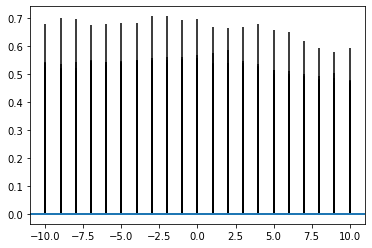

In [184]:

lags1, c1 = state_xcorr(covid_per_cap, 'New_York', 'ny')
lags2, c2 = state_xcorr(covid_per_cap, 'California', 'ca')
lags3, c3 = state_xcorr(covid_per_cap, 'Florida', 'fl')
lags4, c4 = state_xcorr(covid_per_cap, 'Georgia', 'ga')
lags5, c5 = state_xcorr(covid_per_cap, 'Texas', 'tx')

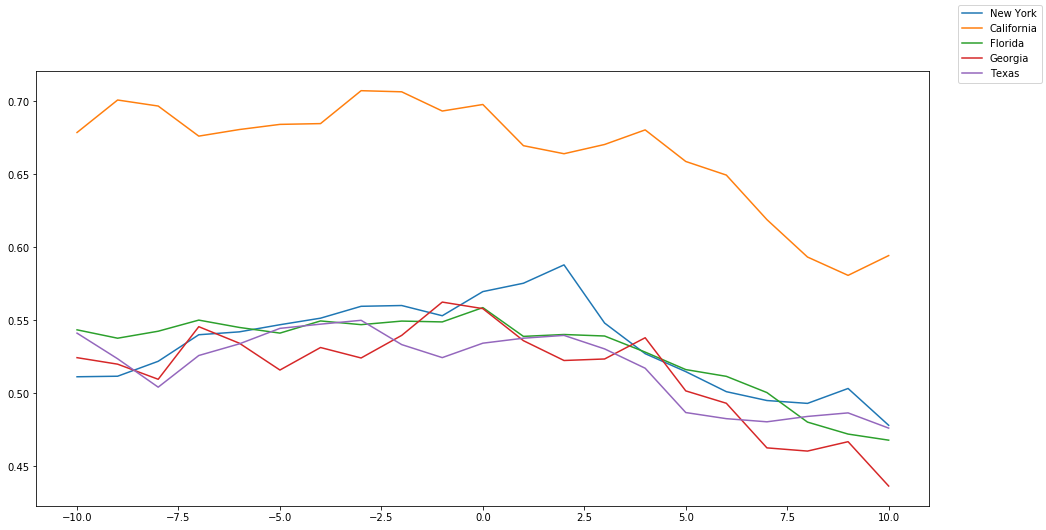

In [191]:
fig = plt.figure(figsize=(16,8))
plt.plot(lags1, c1); # ny
plt.plot(lags2, c2); # ca
plt.plot(lags3, c3); # fl
plt.plot(lags4, c4); # ga
plt.plot(lags5, c5); # tx
fig.legend(['New York', 'California', 'Florida', 'Georgia', 'Texas'])
plt.show()